<a href="https://colab.research.google.com/github/brunobro/a-qualitative-decision-tree-model-for-common-beans-and-cowpea-classification/blob/main/QualitativeDecisionTreeForCommonBeansAndCowpeaClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A qualitative Decision Tree model for Common Beans and Cowpea classification**

**Authors:** Bruno Rodrigues de Oliveira(1,*), Jorge González Aguilera(1,2), Fabio Steiner(2), Diógenes Martins Bardiviesso(2) and Leandris Argentel-Martínez(3)

1 Pantanal Editora, Nova Xavantina-MT; 2 Universidade Estadual de Mato Grosso do Sul/UEMS, Departamento de Agronomia, Cassilândia, MS, Brasil; 3 Tecnológico Nacional de México, Instituto Tecnológico del Valle del Yaqui, Bácum, Sonora, México; Correspondence: bruno@pantanaleditora.com.br

**Abstract:** Common beans and cowpea are two grains that form part of the preferred diet in several countries, mainly due to their nutritional value. Knowledge of their diversity is important for plant breeding and determines the conservation and use strategy. Previous analyzes show that there is variability for a set of qualitative and quantitative descriptors for this species. The objective of the work was to use data from qualitative descriptors to generate a decision tree model that makes it possible to classify common bean and cowpea genotypes. 17 bean genotypes were used, 12 of which were common beans and 5 were cowpeas. Eight qualitative descriptors were used to characterize the bean genotypes. Machine learning techniques were used to generate decision tree models for classifying bean genotypes. Using the accuracy, precision and F1-score metrics in the cross-validation approach, we select the best decision tree model. This model was adapted into a flowchart for use in various purposes, aiming to classify beans based on qualitative descriptors.

**Keywords:** Phaseolus vulgaris L., Vigna unguiculata L. Walp., selection, Machine learning.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import RocCurveDisplay, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from IPython.display import display, SVG
from graphviz import Source
from sklearn.tree import export_graphviz
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
'''
Read data and Create dataset
'''
df = pd.read_excel('data.xlsx', 'Qualitative')
# Show dataset
display(df)

# Class
y = np.array(df['Specie'])

#Delete before converting to array
del df['Genotype']
del df['Name']
del df['Specie']

Variables = df.columns

# Convert categorical data
X = np.array(df)

,Genotype,Name,Specie,Seed color,Primary color,Secondary color,Seed shape,Degree of seed flattening,Seed brightness,Seed halo,Color of Seed Halo
0,G1,Paquito,Phaseolus vulgaris L.,2,95,5,2,1,3,2,1
1,G2,Rajado 1,Phaseolus vulgaris L.,2,90,10,5,1,3,2,2
2,G3,Caupi Sempre Verde,Vigna unguiculata (L.) Walp.,1,100,0,2,3,1,2,2
3,G4,Caupi Nova Era,Vigna unguiculata (L.) Walp.,1,100,0,1,1,1,2,2
4,G5,Caupi BRS Guariba,Vigna unguiculata (L.) Walp.,1,100,0,1,2,1,2,2
5,G6,Caupi BRS Itaim,Vigna unguiculata (L.) Walp.,1,100,0,4,3,1,2,2
6,G7,Caupi BRS Tamucumaqui,Vigna unguiculata (L.) Walp.,1,100,0,1,1,1,2,2
7,G8,Vô Cid,Vigna unguiculata (L.) Walp.,2,90,10,2,2,1,2,1
8,G9,Rajado 2,Vigna unguiculata (L.) Walp.,2,90,10,4,3,5,2,2
9,G10,Vermelho Dark,Phaseolus vulgaris L.,1,100,0,3,3,3,2,2


In [ ]:
#Computa os pesos das classes
classes = np.unique(y)
cw = compute_class_weight(class_weight="balanced", classes=classes, y=y)
class_weight = dict(zip(classes, cw))

In [ ]:
'''
Check the best parameters
'''
param_grid = {"criterion": ['gini', 'entropy'],
              "max_depth": [None, X.shape[1]],
              "max_features": ['sqrt', 'log2', None],
              }

clf = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=5, scoring='accuracy')
clf.fit(X, y)

print(clf.best_params_)
print(clf.best_score_)

{'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt'}
0.7499999999999999


Fold 1
	 Training: 
	 Acc: 1.0000 - Pr: 1.0000 - Re: 1.0000
	 Test: 
	 Acc: 0.7500 - Pr: 0.8333 - Re: 0.7333
Fold 2
	 Training: 
	 Acc: 1.0000 - Pr: 1.0000 - Re: 1.0000
	 Test: 
	 Acc: 1.0000 - Pr: 1.0000 - Re: 1.0000
Fold 3
	 Training: 
	 Acc: 1.0000 - Pr: 1.0000 - Re: 1.0000
	 Test: 
	 Acc: 0.6667 - Pr: 0.7500 - Re: 0.6667
Fold 4


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Training: 
	 Acc: 1.0000 - Pr: 1.0000 - Re: 1.0000
	 Test: 
	 Acc: 0.6667 - Pr: 0.3333 - Re: 0.4000
Fold 5
	 Training: 
	 Acc: 1.0000 - Pr: 1.0000 - Re: 1.0000
	 Test: 
	 Acc: 0.3333 - Pr: 0.2500 - Re: 0.2500


Average - Training
	 Acc: 1.0000 - Pr: 1.0000 - Re: 1.0000
Average - Test
	 Acc: 0.6833 - Pr: 0.6333 - Re: 0.6100


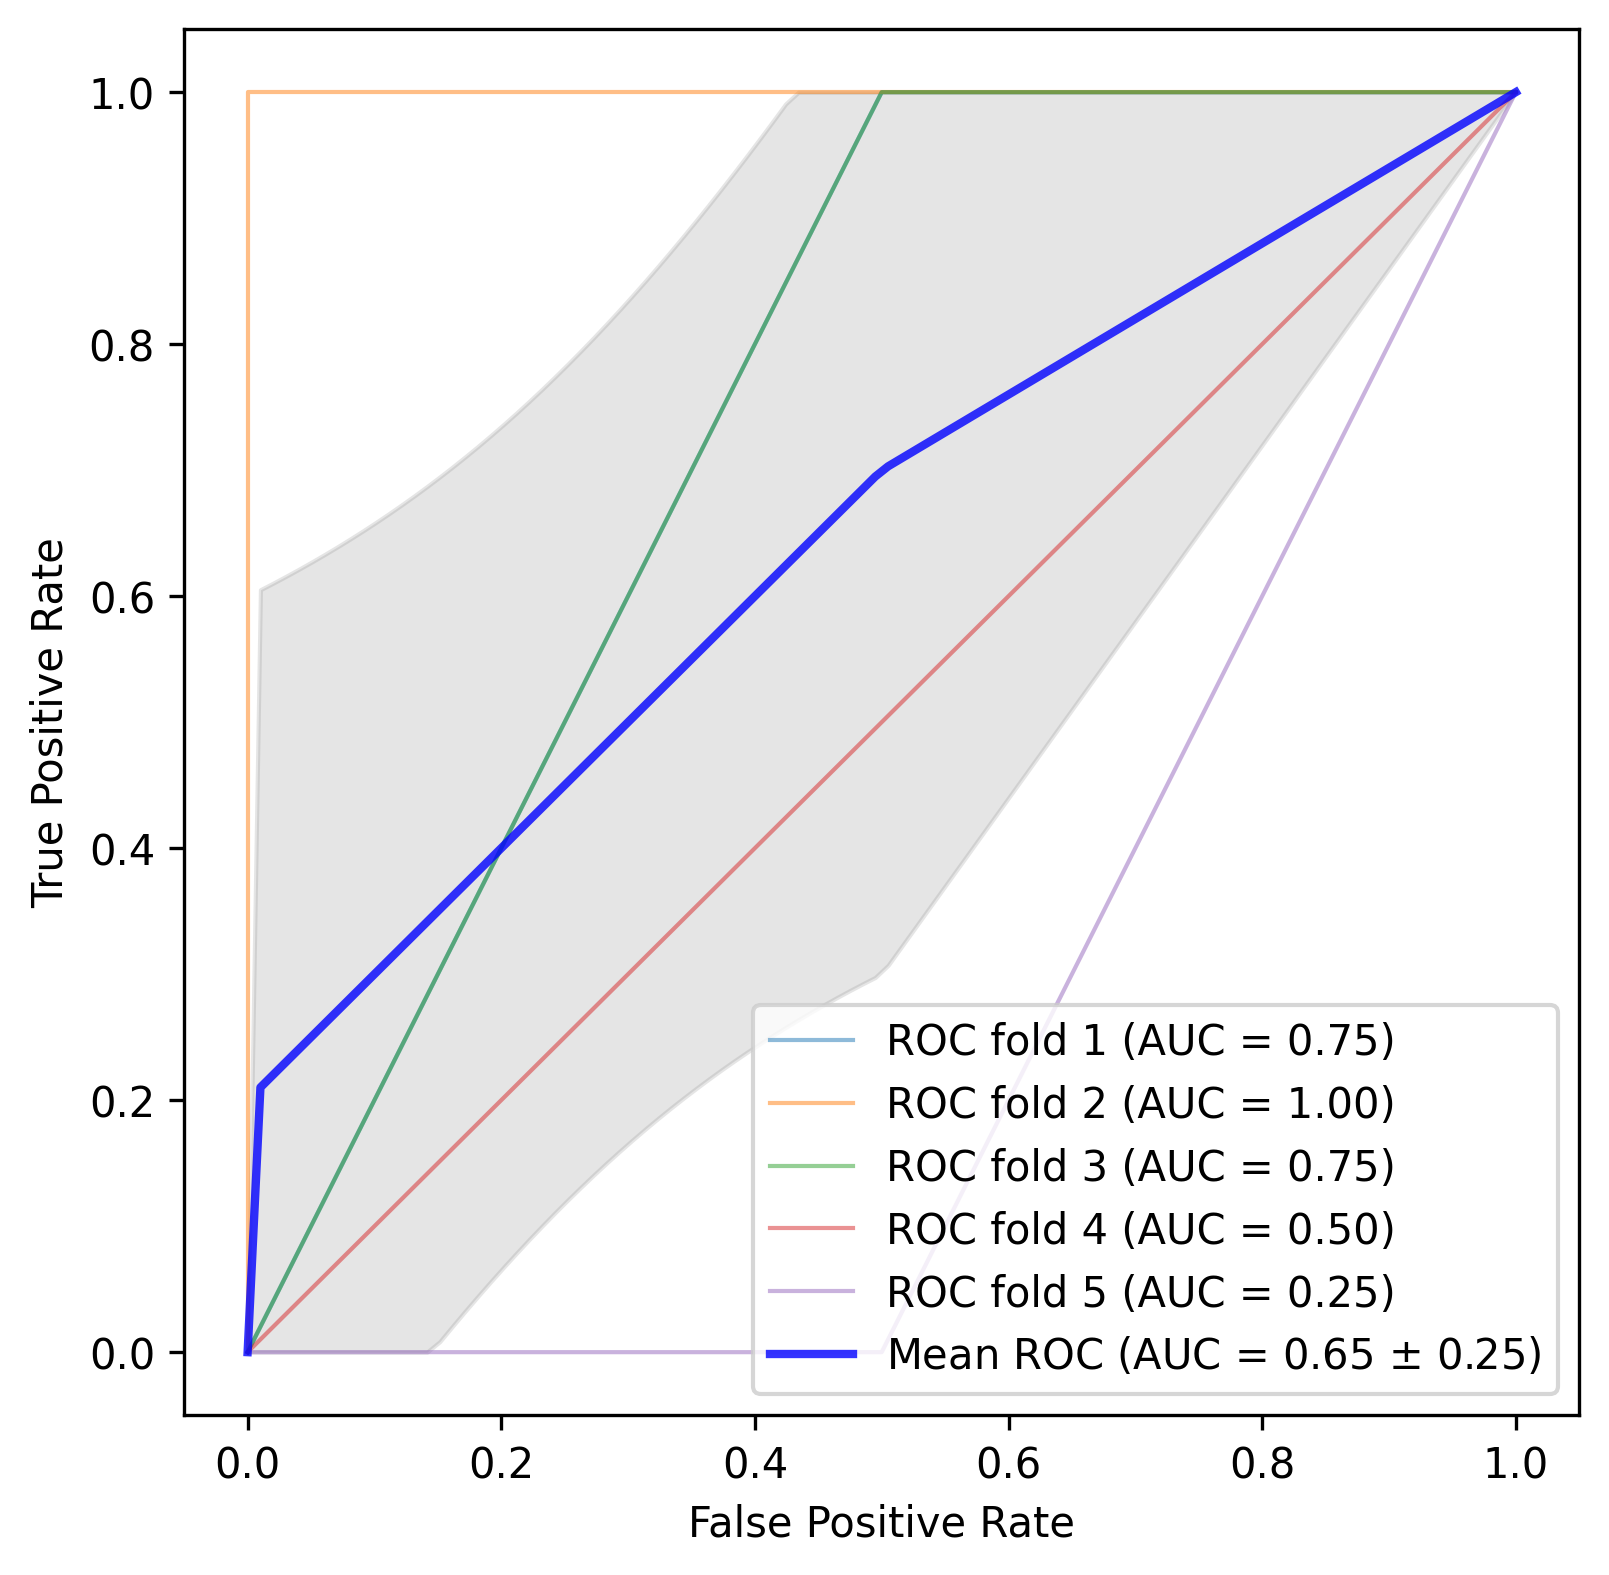

In [ ]:
'''
Decision Tree with fixed parameter, over 5-fold

Best hyperparameters:
{'criterion': 'log_loss', 'max_depth': None, 'max_features': 'sqrt'}
'''
K = 1

acc_train = []
acc_test  = []

pr_train = []
pr_test  = []

re_train = []
re_test  = []

mc_train = []
mc_test  = []

importances = []

train_indices = []
test_indices  = []

best_tree = None
best_acc  = 0

# For ROC curve
fig, ax = plt.subplots(dpi=300, figsize=(6, 6))
n_splits = 5
mean_fpr = np.linspace(0, 1, 100)
tprs     = []
aucs     = []

kfold = StratifiedKFold(n_splits=n_splits)

for train_index, test_index in kfold.split(X, y):
  print('Fold %i' %K)

  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  train_indices.append(train_index)
  test_indices.append(test_index)

  clf = DecisionTreeClassifier(
      random_state=0,
      criterion='gini',
      max_depth=None,
      max_features='log2',
      class_weight=class_weight
      )
  clf.fit(X_train, y_train)

  viz = RocCurveDisplay.from_estimator(clf, X_test, y_test, name=f"ROC fold {K}", alpha=0.5, lw=1, ax=ax)
  interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
  interp_tpr[0] = 0.0
  tprs.append(interp_tpr)
  aucs.append(viz.roc_auc)

  y_pred_train = clf.predict(X_train)
  y_pred_test  = clf.predict(X_test)

  r_acc_train = accuracy_score(y_train, y_pred_train)
  r_acc_test  = accuracy_score(y_test, y_pred_test)
  acc_train.append(r_acc_train)
  acc_test.append(r_acc_test )

  if r_acc_test > best_acc:
    best_acc = r_acc_test
    best_tree = clf
    importances.append(clf.feature_importances_)

  r_pr_train = precision_score(y_train, y_pred_train, average='macro')
  r_pr_test  = precision_score(y_test, y_pred_test, average='macro')
  pr_train.append(r_pr_train)
  pr_test.append(r_pr_test)

  r_re_train = f1_score(y_train, y_pred_train, average='macro')
  r_re_test  = f1_score(y_test, y_pred_test, average='macro')
  re_train.append(r_re_train)
  re_test.append(r_re_test)

  r_mc_train = confusion_matrix(y_train, y_pred_train)
  r_mc_test  = confusion_matrix(y_test, y_pred_test)
  mc_train.append(r_mc_train)
  mc_test.append(r_mc_test)

  print('\t Training: ')
  #print('OOB Score: %.4f' %clf.oob_score_)
  print('\t Acc: %.4f - Pr: %.4f - Re: %.4f' %(r_acc_train, r_pr_train, r_re_train))
  print('\t Test: ')
  print('\t Acc: %.4f - Pr: %.4f - Re: %.4f' %(r_acc_test, r_pr_test, r_re_test))

  K = K + 1

acc_train = np.array(acc_train)
acc_test  = np.array(acc_test)

pr_train = np.array(pr_train)
pr_test  = np.array(pr_test)

re_train = np.array(re_train)
re_test  = np.array(re_test)

mc_train = np.array(mc_train)
mc_test  = np.array(mc_test)

print('\n')
print('Average - Training')
print('\t Acc: %.4f - Pr: %.4f - Re: %.4f' %(acc_train.mean(), pr_train.mean(), re_train.mean()))
print('Average - Test')
print('\t Acc: %.4f - Pr: %.4f - Re: %.4f' %(acc_test.mean(), pr_test.mean(), re_test.mean()))

#Plot ROC curve
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
)

ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
)
ax.legend()
plt.show()


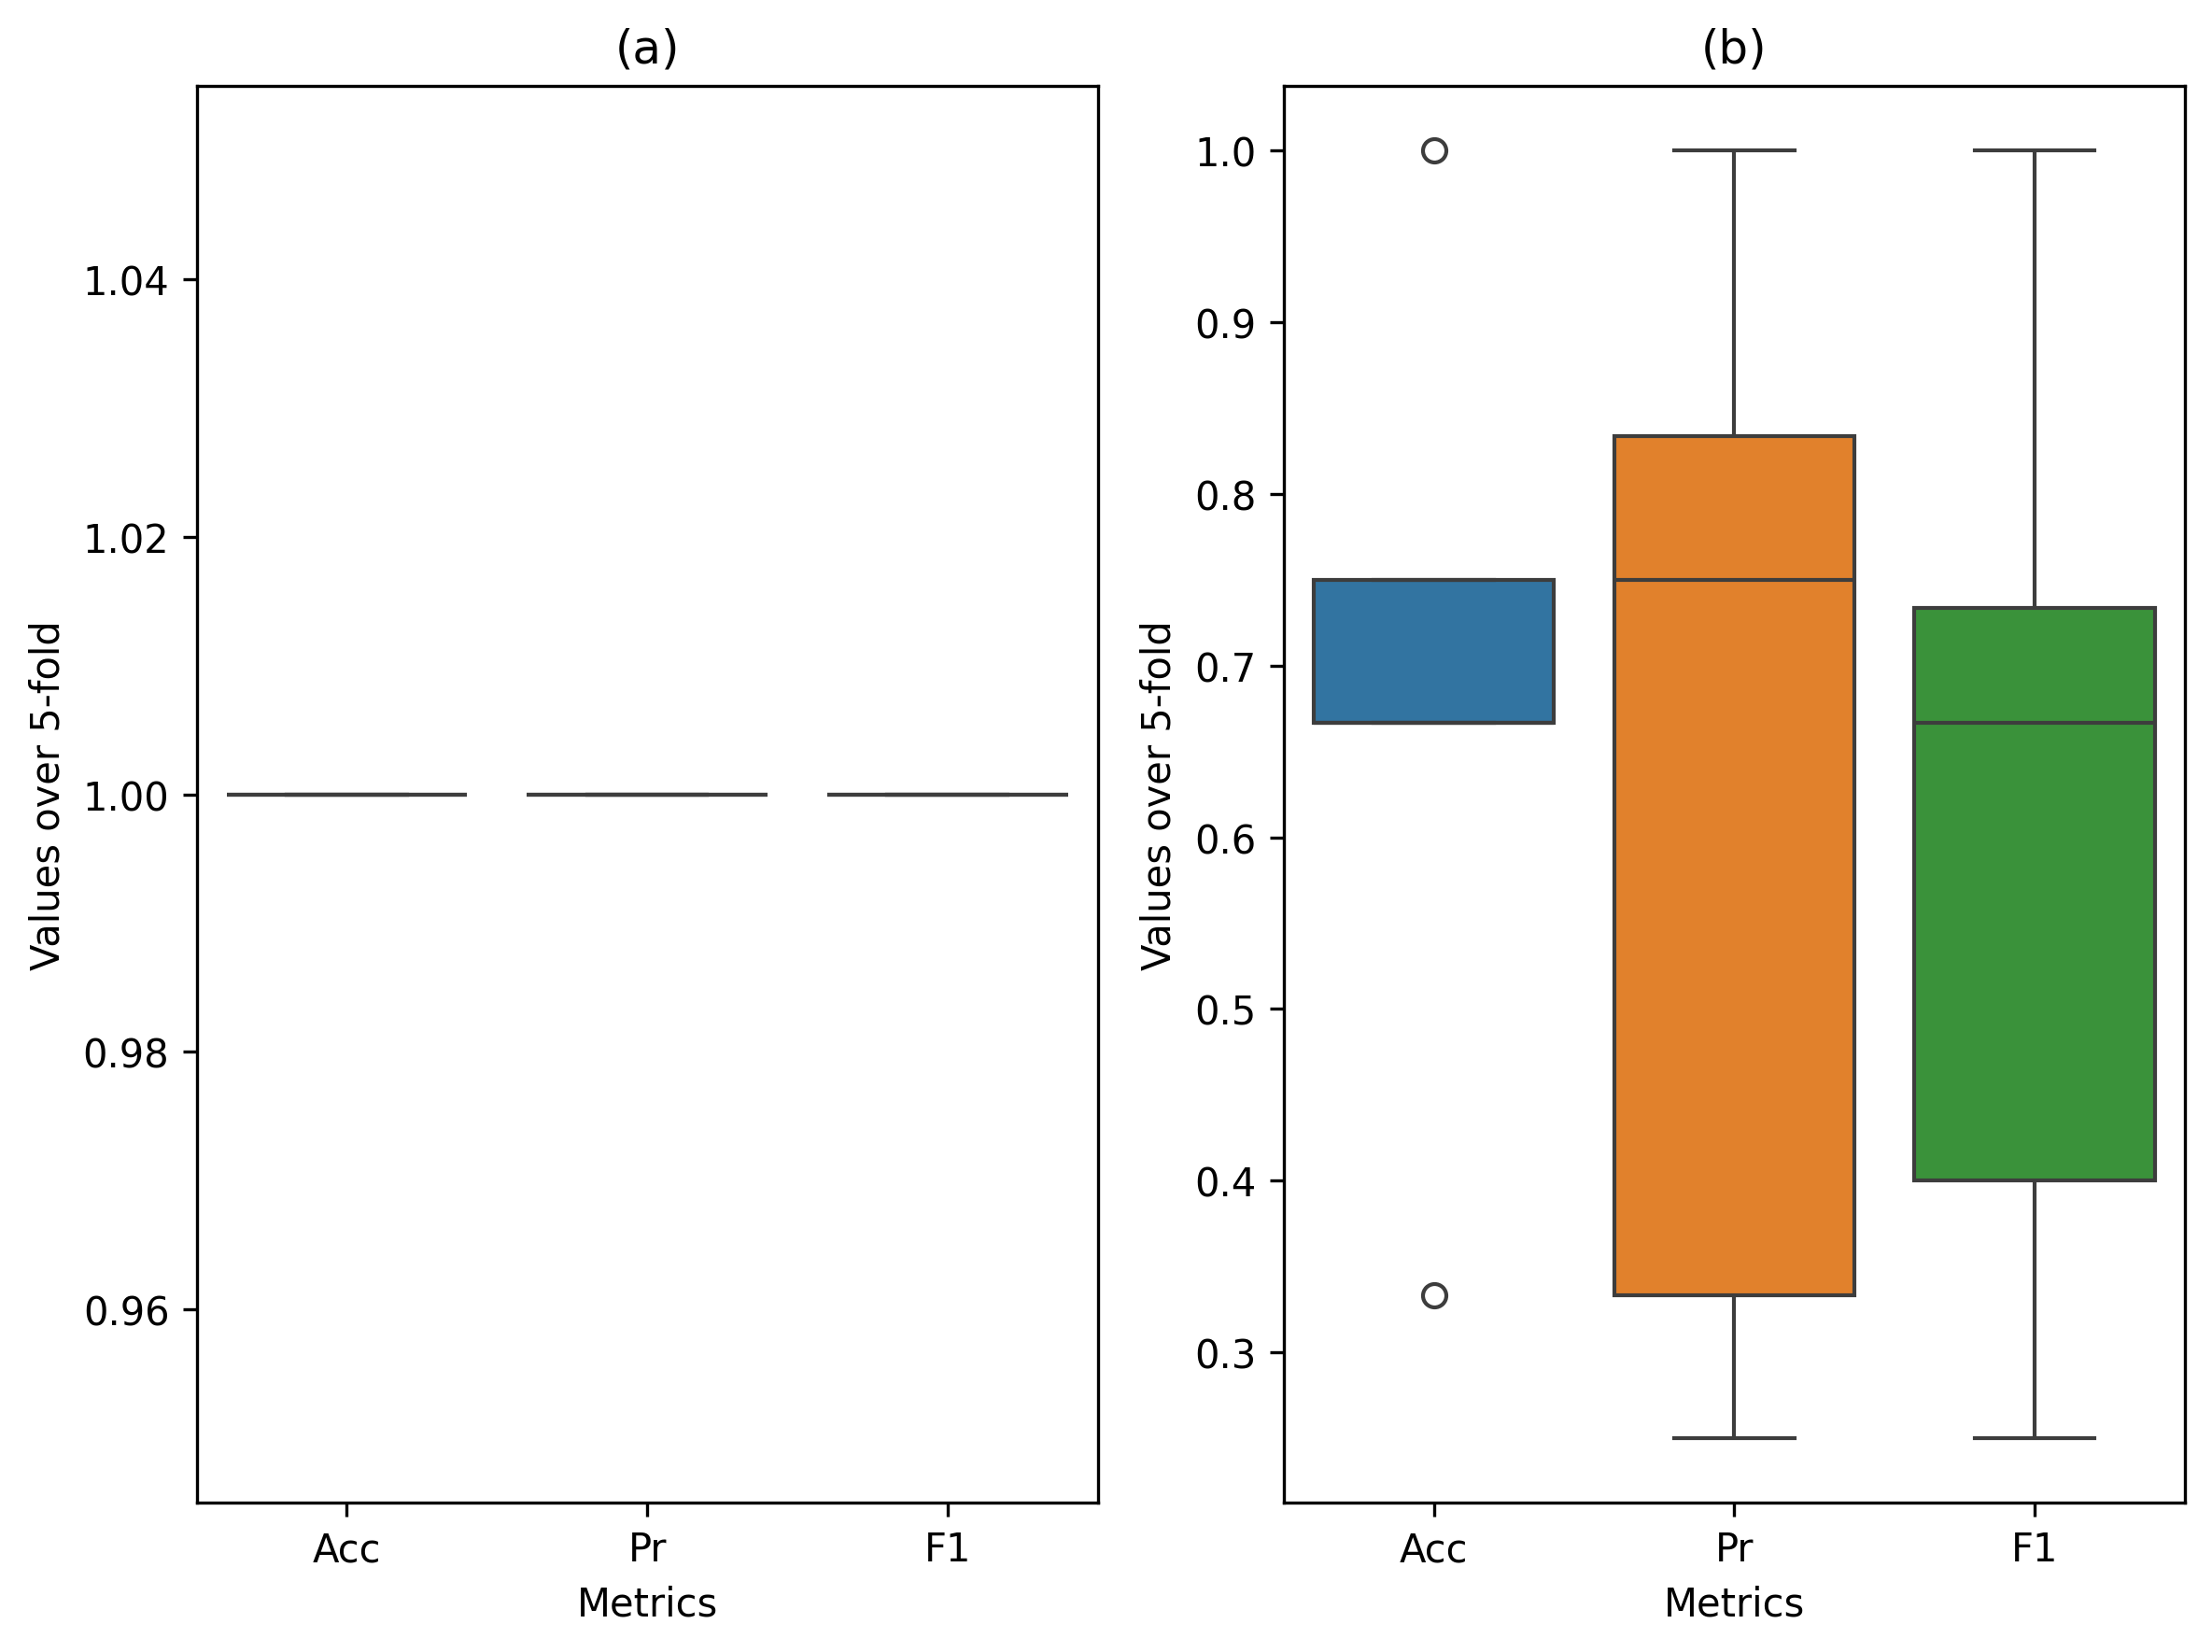

In [ ]:
df_train = pd.DataFrame()
df_train['Acc'] = acc_train
df_train['Pr']  = pr_train
df_train['F1']  = re_train

df_test = pd.DataFrame()
df_test['Acc'] = acc_test
df_test['Pr']  = pr_test
df_test['F1']  = re_test

plt.figure(dpi=300, figsize=(8,6))
plt.subplot(121)
plt.title('(a)')
sns.boxplot(data=df_train)
plt.xlabel('Metrics')
plt.ylabel('Values over 5-fold')
plt.subplot(122)
plt.title('(b)')
sns.boxplot(data=df_test)
plt.xlabel('Metrics')
plt.ylabel('Values over 5-fold')
plt.tight_layout()
plt.show()

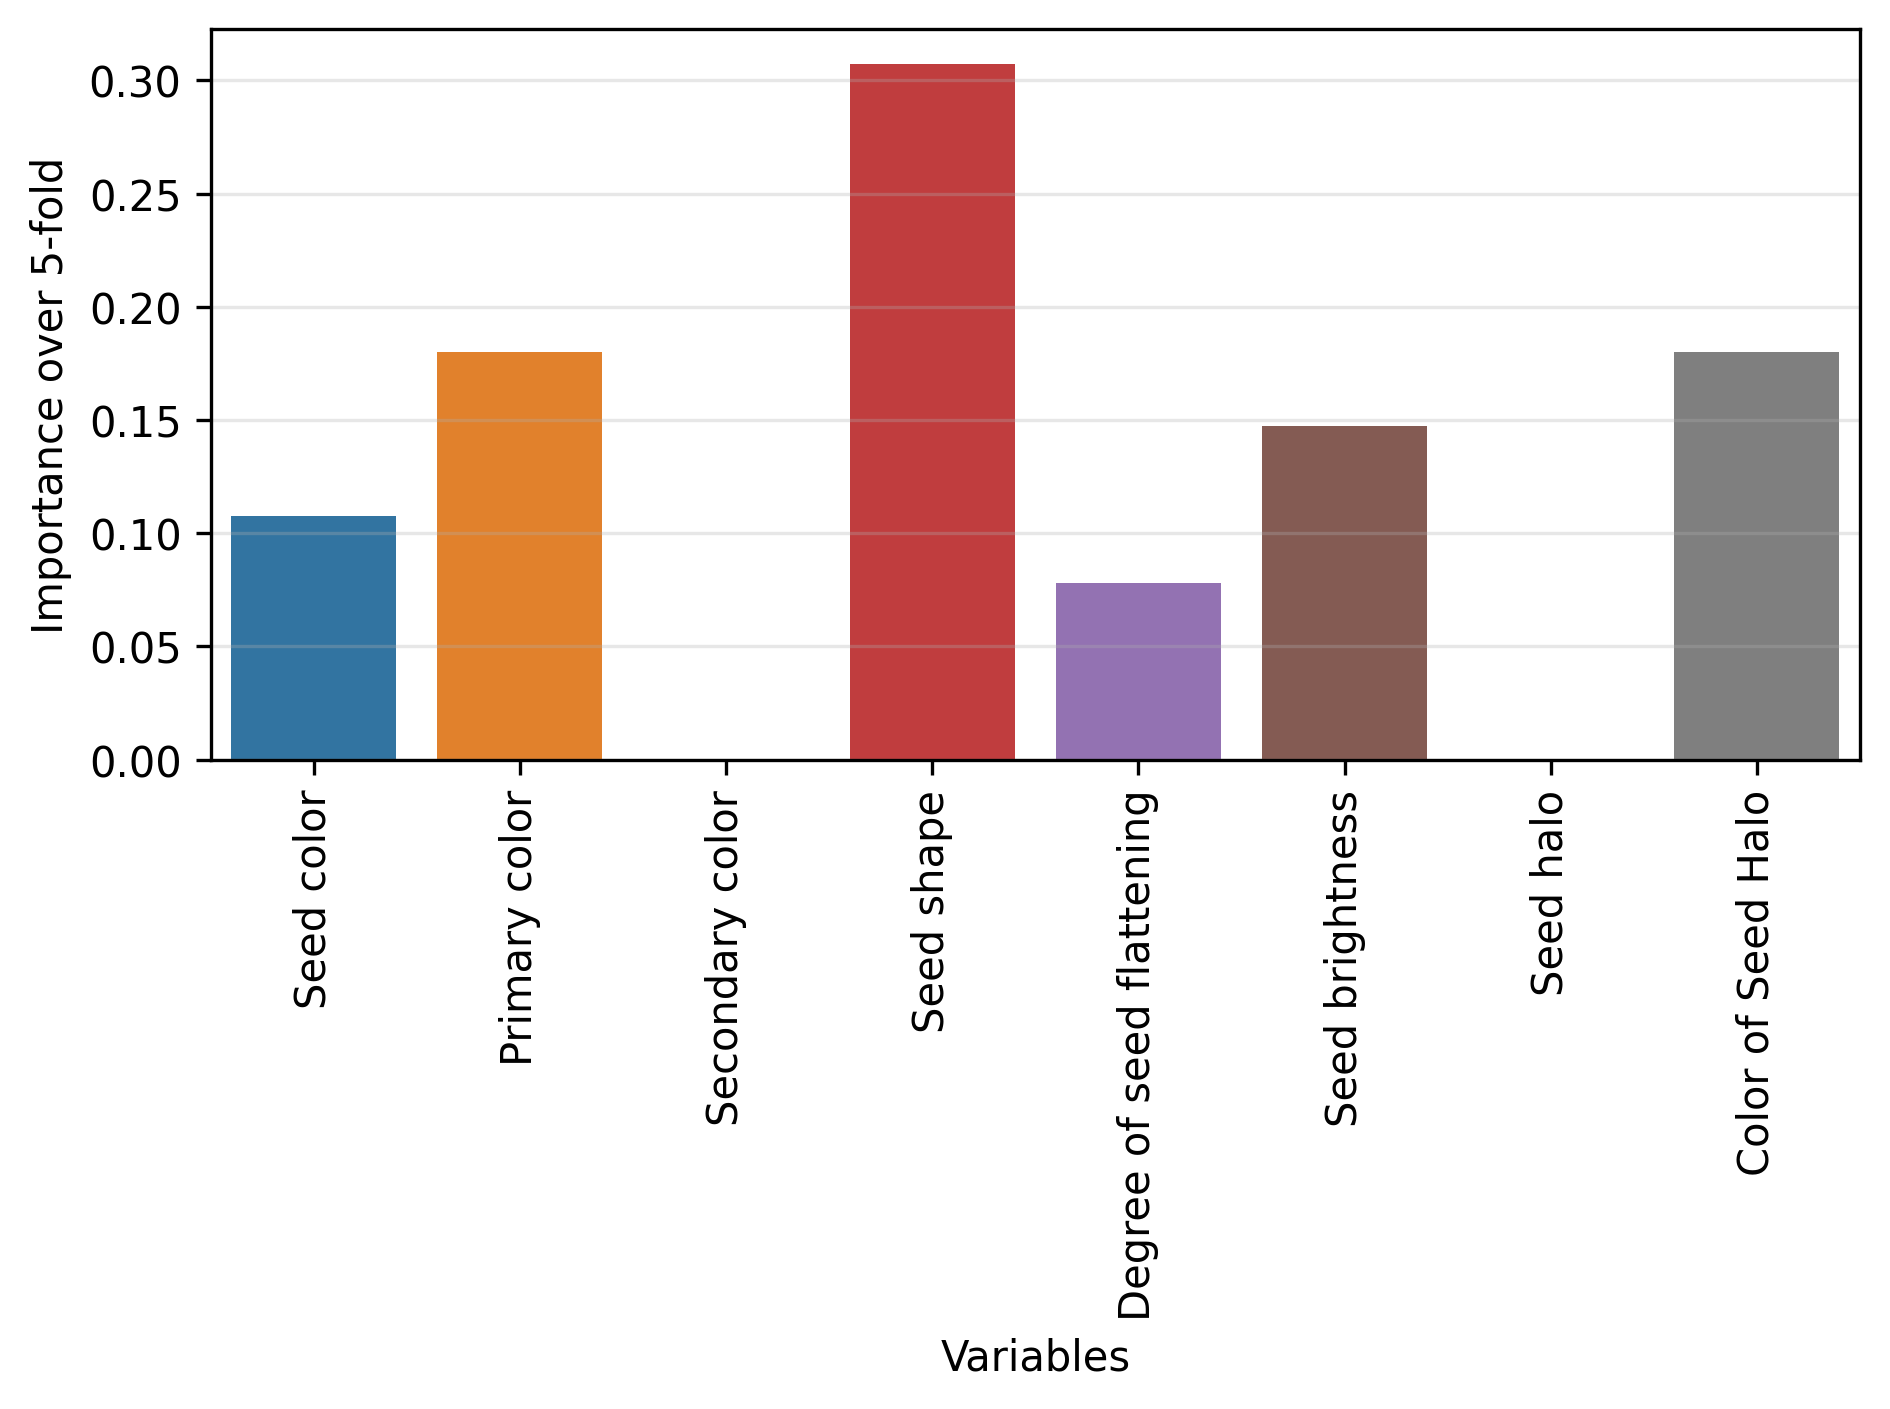

In [ ]:
df_imp = pd.DataFrame(data=importances, columns=Variables)

plt.figure(dpi=300)
plt.grid(alpha=0.3)
sns.barplot(data=df_imp, errorbar=None)
plt.xlabel('Variables')
plt.ylabel('Importance over 5-fold')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

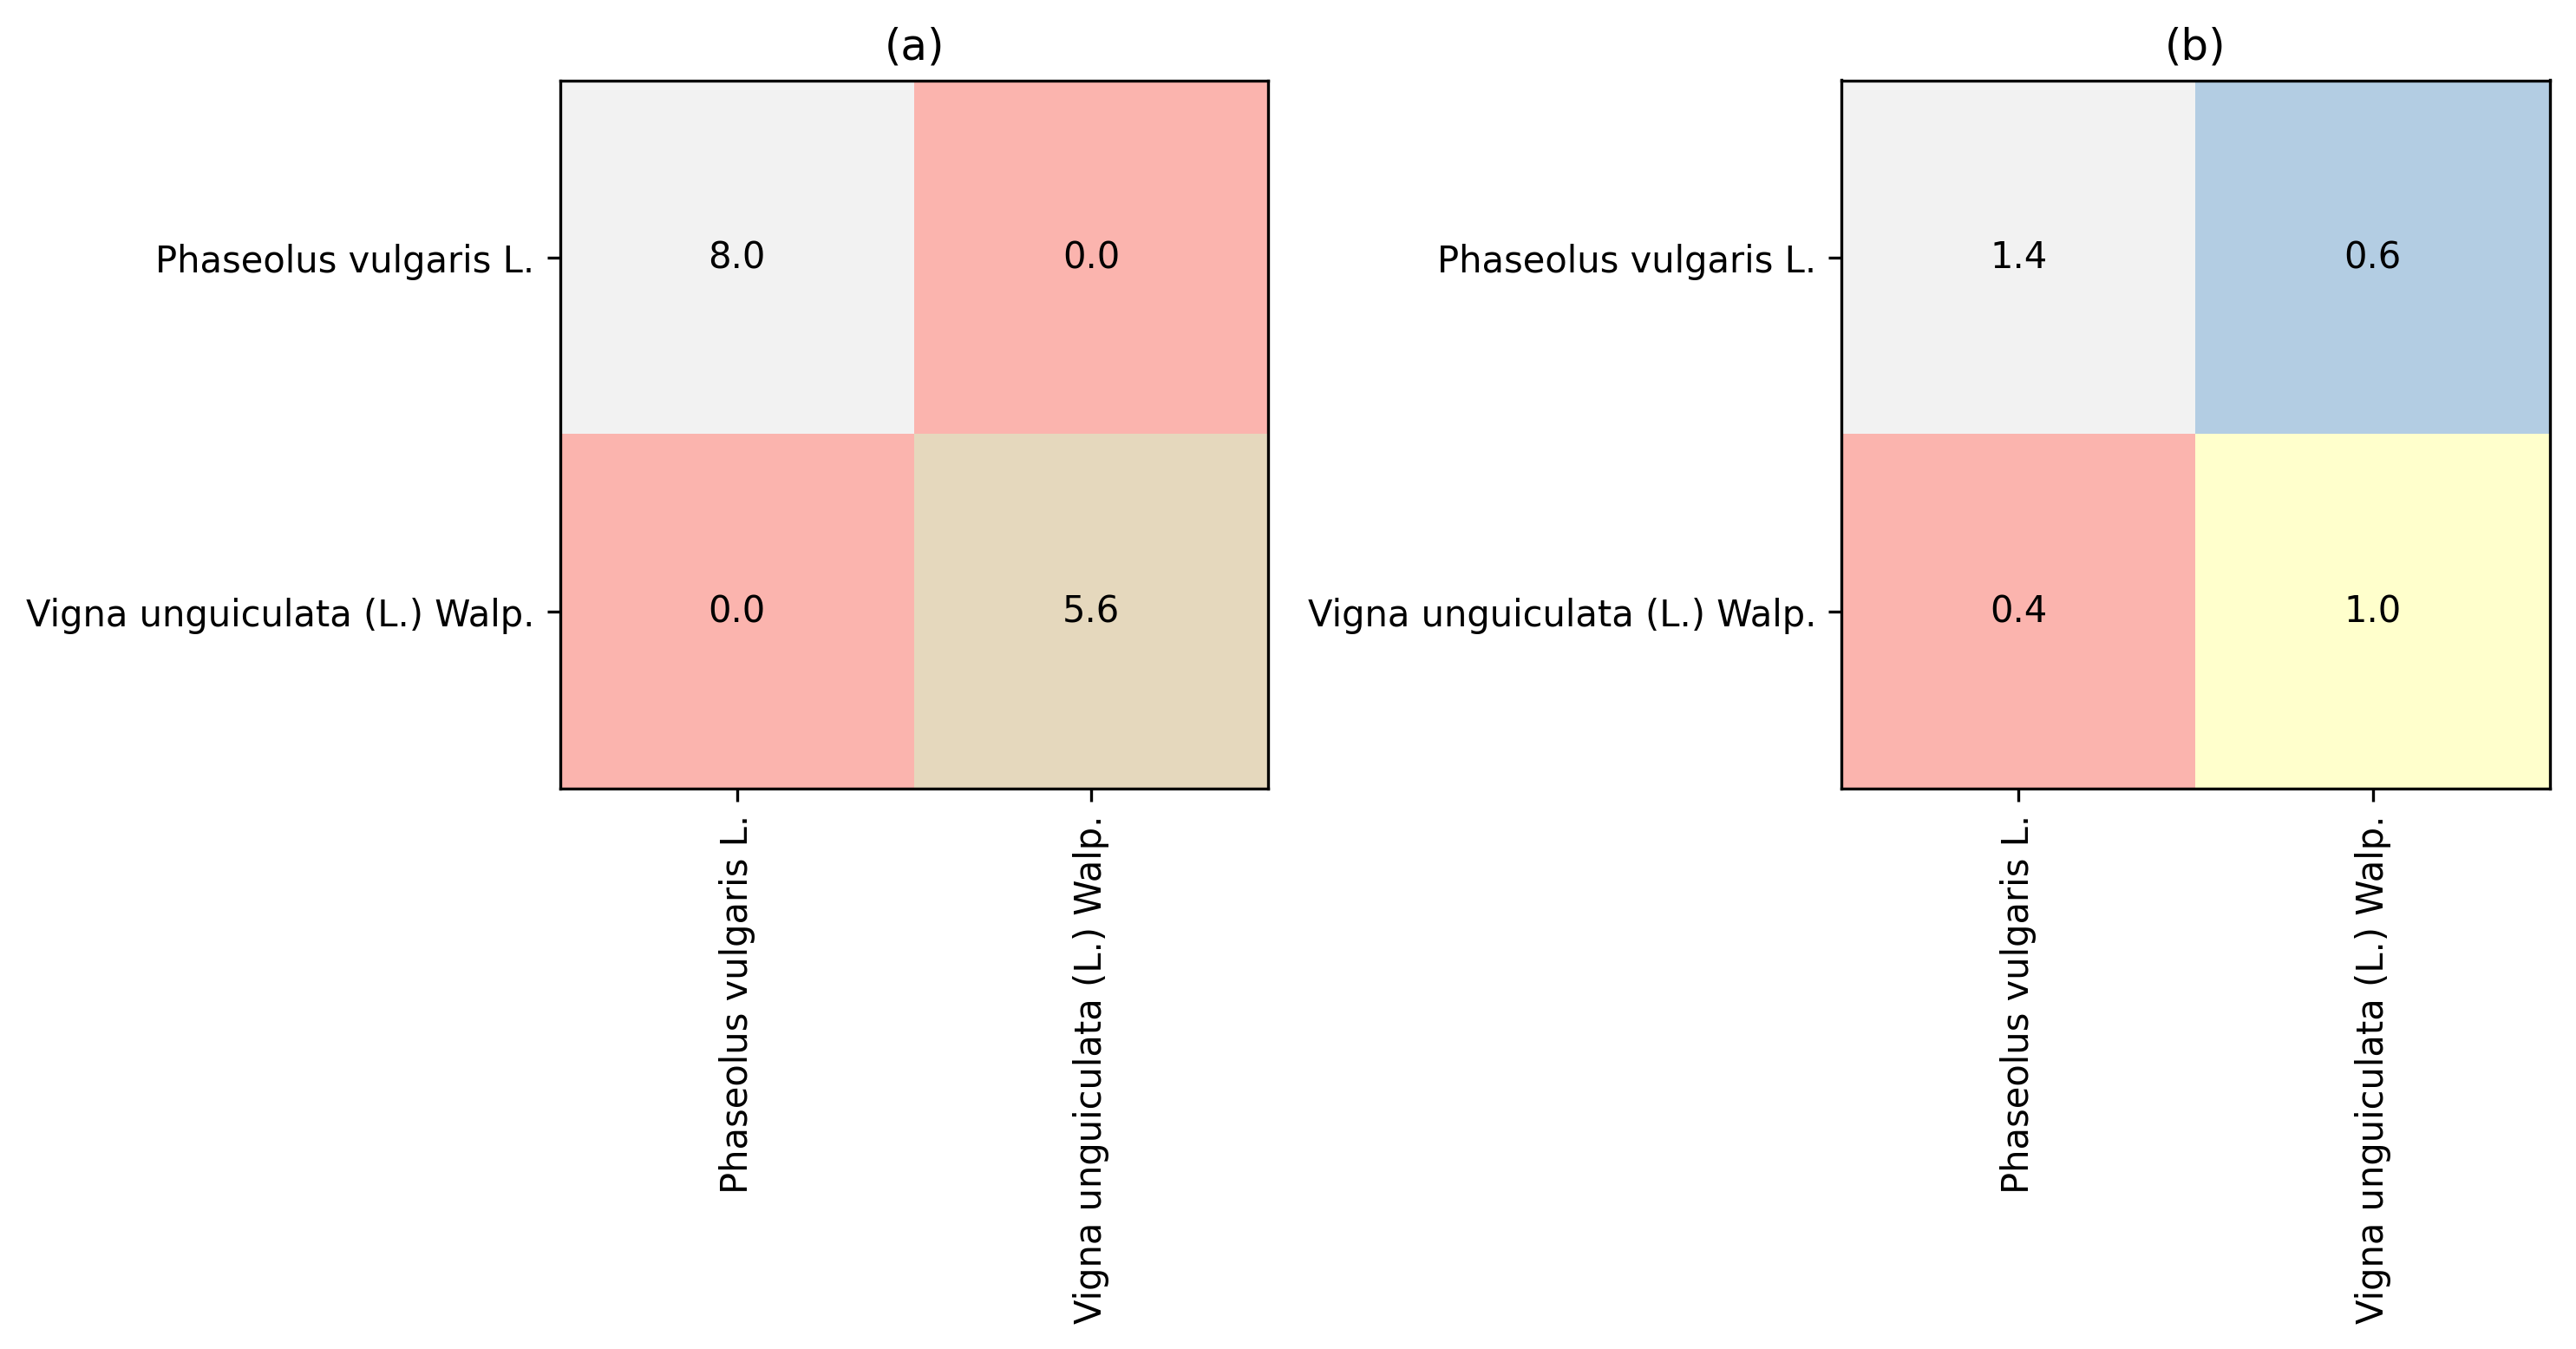

In [ ]:
'''
Plot the average confusion matrix
'''
MC_train = np.mean(mc_train, axis=0)
MC_test  = np.mean(mc_test, axis=0)

fig = plt.figure(dpi=300, figsize=(10,10))
plt.subplot(121)
plt.imshow(MC_train, cmap='Pastel1')
plt.title('(a)')
plt.xticks(np.arange(len(classes)), labels=classes, rotation=90)
plt.yticks(np.arange(len(classes)), labels=classes)

# Loop over data dimensions and create text annotations.
for k in range(len(classes)):
    for j in range(len(classes)):
        text = plt.text(j, k, MC_train[k, j], ha="center", va="center", color="k")

plt.subplot(122)
plt.imshow(MC_test, cmap='Pastel1')
plt.title('(b)')
plt.xticks(np.arange(len(classes)), labels=classes, rotation=90)
plt.yticks(np.arange(len(classes)), labels=classes)

# Loop over data dimensions and create text annotations.
for k in range(len(classes)):
    for j in range(len(classes)):
        text = plt.text(j, k, MC_test[k, j], ha="center", va="center", color="k")

fig.tight_layout()
plt.show()

In [ ]:
'''
Save a decision tree
'''
def saveTree(model, name):
  vars    = df.columns
  classes = list(np.unique(y))
  graph_data = export_graphviz(model, feature_names=vars, class_names=classes, filled=True, rounded=True, out_file=None, impurity=False)
  graph = Source(graph_data)
  SVG(graph.pipe(format='svg'))
  graph.format = 'png'
  graph.render(name, view=True)

saveTree(best_tree, 'best_tree')
